<a href="https://colab.research.google.com/github/aditijoshi613/ML-Basics/blob/master/A4_Linear_Regression_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import california_housing
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns;
import random
from sklearn.preprocessing import StandardScaler

In [ ]:
housing_data = california_housing.fetch_california_housing()

In [ ]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)

In [ ]:
df = df[df.Target < 5]

In [ ]:
X = df.MedInc
y = df.Target


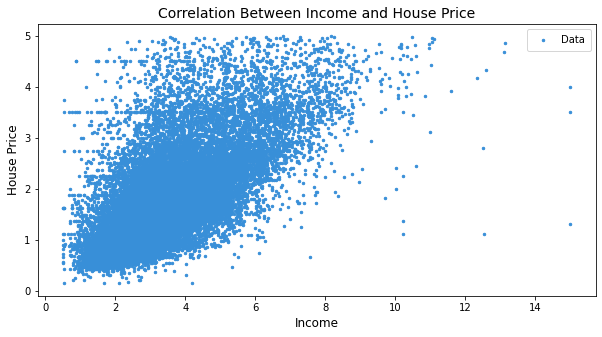

In [ ]:

plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

In [ ]:
def SGD(X,y,lr = 0.01,epochs=100,batch_size = 1):
  ################################################
  ####write your code here######################## 
  #################################################
  m,b = 0.1,0.1
  mse = []
  for i in range(epochs):
    list_indx = np.arange(0,len(X))
    indx = random.choice(list_indx)
    X = np.array(X)
    y = np.array(y)
    Xs = X[indx]
    ys = y[indx]
    N = batch_size
    f = ys - (m*Xs + b)
    # Updating parameters m and b
    m -= lr * (-2 * np.sum(np.dot(Xs,f)) / N)
    b -= lr * (-2 * np.sum(f) / N)
    mse.append(mean_squared_error(y, m*X+b))  
  return m, b, mse

In [ ]:

m, b,  mse = SGD(X, y, lr=0.01, epochs=100, batch_size=2)


Plot the SGD curve(MSE against the epochs), and the line which represents the best fit of the given dataset.


MSE: 0.5840954195413877


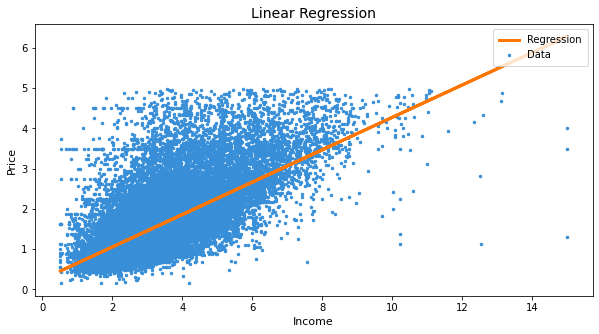

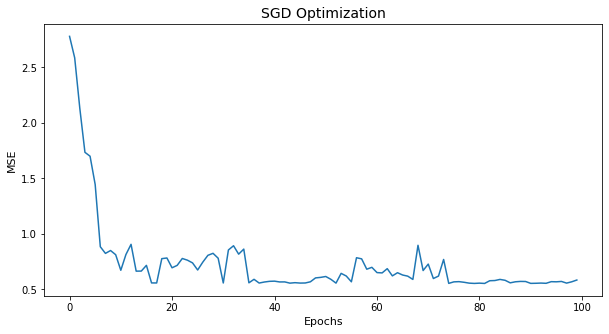

In [ ]:
y_pred = np.dot(m,X) + b
################################################
###########write your code#####################
###############################################
print("MSE:",mean_squared_error(y, y_pred))
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
plt.title('Linear Regression', fontSize=14)
plt.xlabel('Income', fontSize=11)
plt.ylabel('Price', fontSize=11)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()


plt.figure(figsize=(10,5))
plt.plot(range(len(mse)), mse)
plt.title('SGD Optimization', fontSize=14)
plt.xlabel('Epochs', fontSize=11)
plt.ylabel('MSE', fontSize=11)
plt.show()